In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os

In [3]:
base_path = "/content/drive/My Drive/Msc Thesis/Bulge/"

no_bulge_path = 'No Bulge + Aug'
serious_bulge_path = 'Serious Bulge + Aug'

no_bulge = os.listdir(base_path + no_bulge_path)
serious_bulge = os.listdir(base_path + serious_bulge_path)

In [4]:
# import glob

# # Folder path containing images
# folder_path = base_path + serious_bulge_path

# # Number of images to delete
# x = 215

# # Get a list of image files in the folder
# image_files = glob.glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension as needed

# # Sort the image files by modification time (last modified first)
# image_files.sort(key=os.path.getmtime, reverse=True)

# # Delete the last x images
# for i in range(x):
#     if i < len(image_files):
#         os.remove(image_files[i])
#         print("Deleted:", image_files[i])
#     else:
#         print("No more images to delete.")

In [5]:
# import glob
# import shutil

# source_folder = base_path + 'Serious Bulge'
# destination_folder = base_path + serious_bulge_path
# image_files = glob.glob(os.path.join(source_folder, '*.png'))  # Adjust the file extension as needed

# # Loop through each image file and copy it to the destination folder
# for image_file in image_files:
#     # Extract the filename from the path
#     filename = os.path.basename(image_file)
#     # Construct the destination path
#     destination_path = os.path.join(destination_folder, filename)
#     # Copy the file
#     shutil.copyfile(image_file, destination_path)
#     print(f"Copied: {filename} to {destination_folder}")

In [6]:
print("There are ", len(no_bulge), " MRI images with No Bulge")
print("There are ", len(serious_bulge), " MRI images with Serious Bulge")

There are  2500  MRI images with No Bulge
There are  2500  MRI images with Serious Bulge


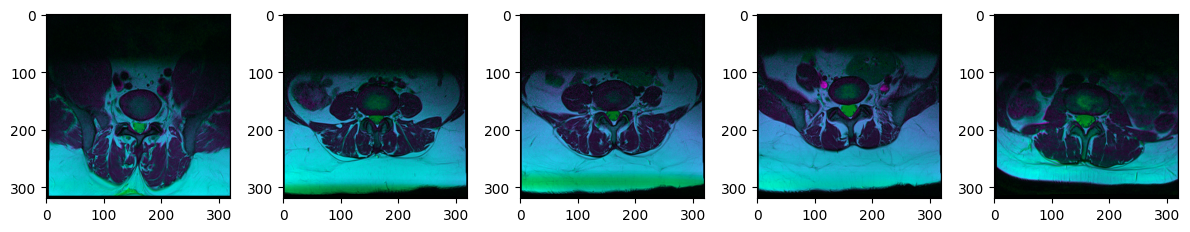

In [7]:
def visualize_image(sub_path, cs_status):
  plt.figure(figsize = (12,12))
  for i in range(5):
      plt.subplot(1, 5 , i+1)
      img = cv2.imread(base_path + sub_path + "/" + cs_status[i])
      plt.imshow(img)
      plt.tight_layout()
  plt.show()

## Visualization for MRI scans with No Bulge
visualize_image(no_bulge_path, no_bulge)

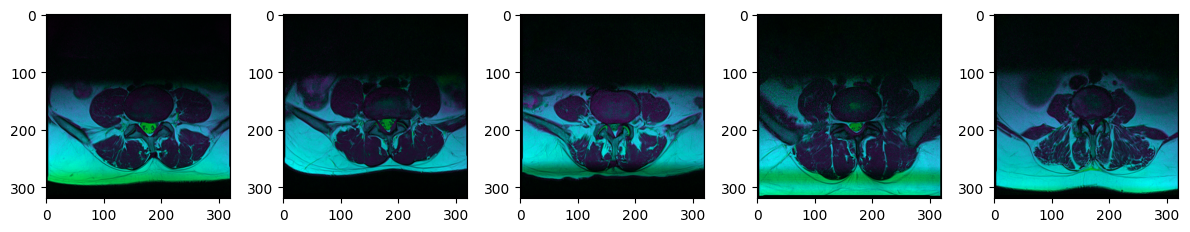

In [8]:
## Visualization for MRI scans with Serious Bulge
visualize_image(serious_bulge_path, serious_bulge)

### Load and Process Images

In [9]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [10]:
class_folders = [no_bulge_path, serious_bulge_path]

# Function to load and process images for multiclass classification
def process_images(base_path, class_folders):
    images = []
    labels = []
    for class_idx, class_folder in enumerate(class_folders):
        class_dir = os.path.join(base_path, class_folder)
        for filename in os.listdir(class_dir):
            if filename.endswith(".png"):  # Adjust the file extension if needed
                img = load_img(os.path.join(class_dir, filename), target_size=(150, 150))
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(class_idx)
    return images, labels

all_images, all_labels = process_images(base_path, class_folders)

# convert labels to categorical format
categorical_labels = to_categorical(all_labels, num_classes=len(class_folders))

In [11]:
all_images = np.array(all_images)
categorical_labels = np.array(categorical_labels)

[[[[0.         0.00392157 0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.00392157 0.        ]
   ...
   [0.01960784 0.03529412 0.        ]
   [0.01176471 0.02745098 0.        ]
   [0.03137255 0.03137255 0.        ]]

  [[0.00392157 0.00392157 0.        ]
   [0.         0.00392157 0.        ]
   [0.00392157 0.00392157 0.        ]
   ...
   [0.01176471 0.06666667 0.        ]
   [0.01568628 0.03529412 0.        ]
   [0.01568628 0.03137255 0.        ]]

  [[0.01176471 0.00784314 0.00392157]
   [0.02352941 0.01960784 0.00392157]
   [0.02352941 0.01568628 0.00784314]
   ...
   [0.01960784 0.03921569 0.        ]
   [0.01176471 0.04313726 0.        ]
   [0.03137255 0.01960784 0.01176471]]

  ...

  [[0.         0.00392157 0.        ]
   [0.         0.00392157 0.        ]
   [0.9254902  0.84705883 0.07843138]
   ...
   [0.81960785 0.75686276 0.0627451 ]
   [0.9019608  0.8        0.10196079]
   [0.         0.00392157 0.        ]]

  [[0.         0.00392157 0.        ]
   [0. 

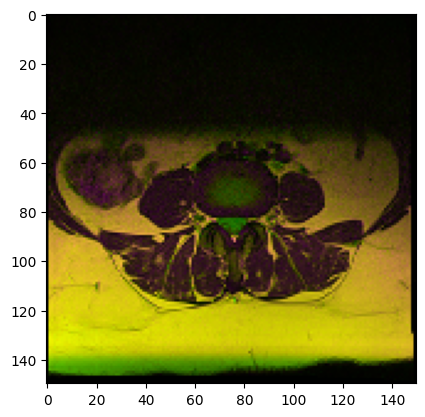

In [12]:
print(all_images[:2])
plt.imshow(all_images[1])
plt.show()

### Save Images and Labels

In [13]:
np.save('/content/drive/My Drive/Msc Thesis/bulge_images.npy', all_images)

In [14]:
np.save('/content/drive/My Drive/Msc Thesis/bulge_labels.npy', categorical_labels)

### Load Images and Labels

In [15]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

all_images = np.load('/content/drive/My Drive/Msc Thesis/bulge_images.npy')

In [16]:
categorical_labels = np.load('/content/drive/My Drive/Msc Thesis/bulge_labels.npy')

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, categorical_labels, test_size=0.2, random_state=42)

In [18]:

print(f'Shape of training image : {X_train.shape}')
print(f'Shape of validation image : {X_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of validation labels : {y_test.shape}')


Shape of training image : (4000, 150, 150, 3)
Shape of validation image : (1000, 150, 150, 3)
Shape of training labels : (4000, 2)
Shape of validation labels : (1000, 2)


### Build and Train the Model

In [19]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Cropping2D, Flatten, Dropout
from keras import optimizers

In [20]:
# Build the  model
disc_bulge_model = Sequential()

# Add cropping layer
disc_bulge_model.add(tf.keras.layers.Cropping2D(cropping=((45, 25), (25, 25)), input_shape=(150, 150, 3))) # cropping=((top_crop, bottom_crop), (left_crop, right_crop))

# disc_bulge_model and Pooling layers
disc_bulge_model.add(Conv2D(64, (3, 3), activation="relu", padding='same'))
disc_bulge_model.add(MaxPooling2D(pool_size=(2, 2)))
disc_bulge_model.add(Dropout(0.2))

disc_bulge_model.add(Conv2D(128, (3, 3), activation="relu", padding='same'))
disc_bulge_model.add(MaxPooling2D(pool_size=(2, 2)))
disc_bulge_model.add(Dropout(0.2))

disc_bulge_model.add(Conv2D(256, (3, 3), activation="relu", padding='same'))
disc_bulge_model.add(MaxPooling2D(pool_size=(2, 2)))
disc_bulge_model.add(Dropout(0.2))

disc_bulge_model.add(Conv2D(512, (3, 3), activation="relu", padding='same'))
disc_bulge_model.add(MaxPooling2D(pool_size=(2, 2)))
disc_bulge_model.add(Dropout(0.2))

# Flatten and Fully Connected layers
disc_bulge_model.add(Flatten())
disc_bulge_model.add(Dense(512, activation='relu'))
# disc_bulge_model.add(Dropout(0.2))
disc_bulge_model.add(Dense(256, activation='relu'))
# disc_bulge_model.add(Dropout(0.2))
disc_bulge_model.add(Dense(128, activation='relu'))

# Output layer
disc_bulge_model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
disc_bulge_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
disc_bulge_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 80, 100, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 80, 100, 64)       1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 50, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 40, 50, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 50, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 25, 128)       0         
 g2D)                                                   

In [21]:
from keras.callbacks import ModelCheckpoint

# Save the best model
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/Msc Thesis/saved_model/bulge_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

history = disc_bulge_model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 0.7048 - accuracy: 0.5340

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 20s 380ms/step - loss: 0.7048 - accuracy: 0.5340 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/50
32/32 [==============================] - 4s 119ms/step - loss: 0.6939 - accuracy: 0.5455 - val_loss: 0.6659 - val_accuracy: 0.6660
Epoch 3/50
32/32 [==============================] - 4s 117ms/step - loss: 0.6841 - accuracy: 0.6202 - val_loss: 0.6096 - val_accuracy: 0.7310
Epoch 4/50
32/32 [==============================] - 4s 118ms/step - loss: 0.5650 - accuracy: 0.7132 - val_loss: 0.5320 - val_accuracy: 0.7560
Epoch 5/50
32/32 [==============================] - 4s 118ms/step - loss: 0.5300 - accuracy: 0.7448 - val_loss: 0.5268 - val_accuracy: 0.7630
Epoch 6/50
32/32 [==============================] - 4s 117ms/step - loss: 0.4996 - accuracy: 0.7602 - val_loss: 0.4923 - val_accuracy: 0.7800
Epoch 7/50
32/32 [==============================] - 4s 110ms/step - loss: 0.4856 - accuracy: 0.7765 - val_loss: 0.4577 - val_accuracy: 0.7800
Epoch 8/50
32/32

### Load Model

In [22]:
from tensorflow.keras.models import load_model

ClinicalSignificance_model = load_model("/content/drive/My Drive/Msc Thesis/saved_model/bulge_model.h5")

### Model Evaluation

**Training and Validation Accuracy**

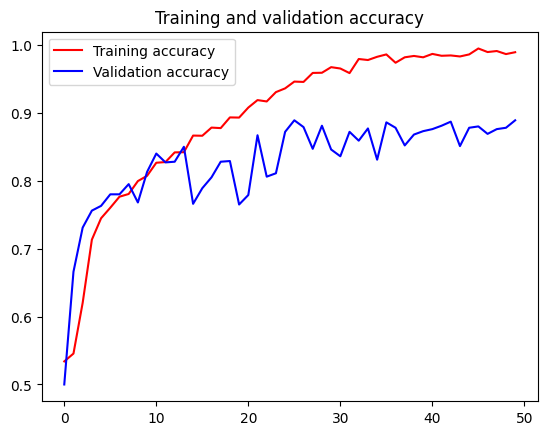

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

32/32 [==============================] - 1s 22ms/step


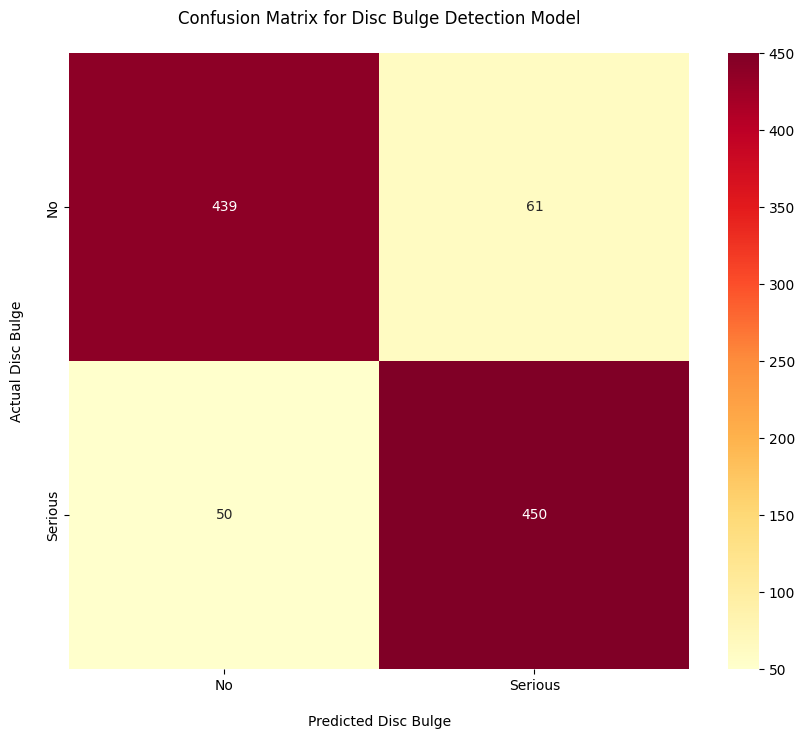

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted labels (assuming your model outputs class probabilities)
y_pred_probs = disc_bulge_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Create confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)  # Convert one-hot encoded labels to class labels

# Create heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
sns.heatmap(cm, annot=True, fmt=".0f", cmap='YlOrRd')

# Add class labels and title
class_labels = ['No', 'Serious']  # Adjust based on your class names
plt.xticks(np.arange(len(class_labels))+0.5, class_labels)
plt.yticks(np.arange(len(class_labels))+0.5, class_labels)
plt.xlabel('\nPredicted Disc Bulge')
plt.ylabel('Actual Disc Bulge\n')
plt.title('Confusion Matrix for Disc Bulge Detection Model\n')

# Show the plot
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Get predicted labels (the model outputs class probabilities)
y_pred_probs = disc_bulge_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Print classification report
class_labels = ['No', 'Serious']
target_names = [f'{label} Bulge' for label in class_labels]
cm_evaluation = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
print(cm_evaluation)


32/32 [==============================] - 0s 8ms/step
               precision    recall  f1-score   support

     No Bulge       0.90      0.88      0.89       500
Serious Bulge       0.88      0.90      0.89       500

     accuracy                           0.89      1000
    macro avg       0.89      0.89      0.89      1000
 weighted avg       0.89      0.89      0.89      1000



### LIME Image Explainer

In [28]:
#!pip install Lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e3b7bfd46f4c59e12fd6ba0e61aa7f16d9f19a9a6c448e6414767f05f9a2780b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built Lime


In [29]:
import lime
from lime import lime_image

# Import mark_boundaries function
from skimage.segmentation import mark_boundaries

In [30]:
# Using LIME Image Explainer
image_to_explain = X_test[10]                # Replace this with the image you want to explain


def predict(image_array):
    return disc_bulge_model.predict(image_array)

# Create a LimeImageExplainer object
explainer = lime_image.LimeImageExplainer()

# Generate an explanation for the image
explanation = explainer.explain_instance(
    image_to_explain,
    predict,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


#### Superpixel for the top most Prediction

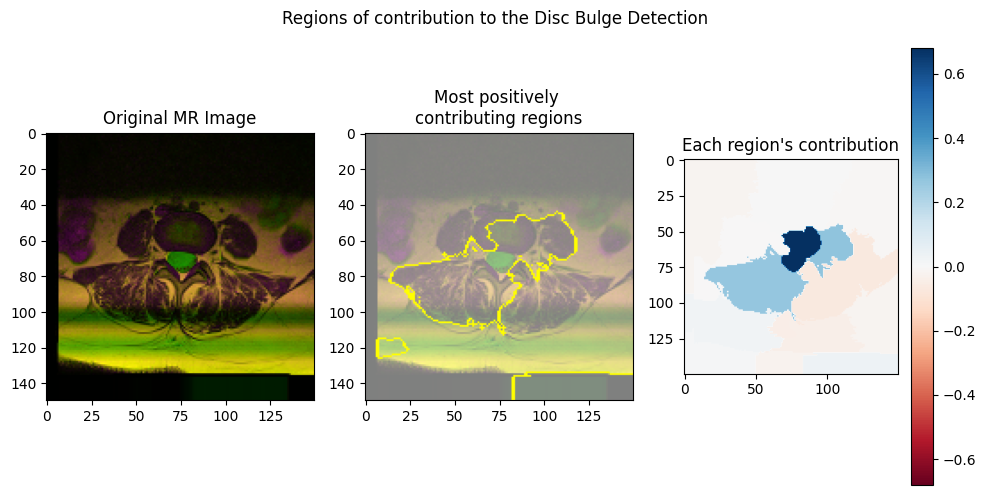

In [31]:
# Select the same class explained on the figures above.
ind = explanation.top_labels[0]

# Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

# Get the original image and the mask for the top features
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Plot the original image to explain
plt.figure(figsize=(10, 5))
plt.suptitle("Regions of contribution to the Disc Bulge Detection")
plt.subplot(1, 3, 1)
plt.imshow(image_to_explain)
plt.title('Original MR Image')

# Plot the superpixels (for the most positively contributing regions)
plt.subplot(1, 3, 2)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title('Most positively \ncontributing regions')

# Plot the heatmap (each region's contribution)
plt.subplot(1, 3, 3)
plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("Each region's contribution")


plt.tight_layout()
plt.show()
